In [139]:
import openmc
import matplotlib.pyplot as plt

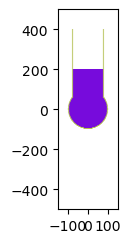

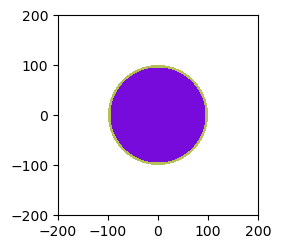

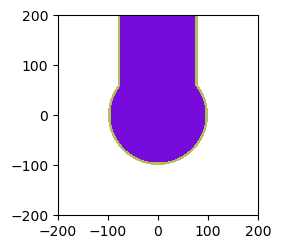

In [140]:
#create a thermometer 
mercury = openmc.Material(name='mercury')
mercury.add_element('Hg', 1)

#create glass - Easier method..?
glass = openmc.Material(name='glass')
glass.add_element('Si',percent=368/15,percent_type='ao')
glass.add_element('O',percent=(736/15),percent_type='ao')
glass.add_element('Na',percent=32/3,percent_type='ao')
glass.add_element('O',percent=16/3,percent_type='ao')
glass.add_element('Ca',percent=5.2/2,percent_type='ao')
glass.add_element('O',percent=5.2/2,percent_type='ao')
glass.add_element('K',percent=0.4,percent_type='ao')
glass.add_element('O',percent=0.2,percent_type='ao')
glass.add_element('Mg',percent=1.8,percent_type='ao')
glass.add_element('O',percent=1.8,percent_type='ao')
glass.set_density('g/cm3', 2.5)

outer_sphere = openmc.Sphere(r=100)
inner_sphere = openmc.Sphere(r=95)
sphere_region = +inner_sphere & -outer_sphere

internal_central_column = openmc.ZCylinder(r=75)
external_central_column = openmc.ZCylinder(r=80)

bottom_column = openmc.ZPlane(0)
top_column = openmc.ZPlane(400)
top_liquid = openmc.ZPlane(200)

internal_column = -internal_central_column & +bottom_column
sphere_region = +inner_sphere & -outer_sphere & ~internal_column

column_region = +internal_central_column & -external_central_column & -top_column & +bottom_column & ~-outer_sphere

column_cell = openmc.Cell(region=sphere_region | column_region)

internal_region = -inner_sphere | -internal_central_column &-top_liquid &+bottom_column
internal_cell = openmc.Cell(region=internal_region)

internal_cell.fill = mercury
column_cell.fill = glass
column_universe = openmc.Universe(cells=[column_cell, internal_cell])

plt.show(column_universe.plot(width=(300,1000), basis='xz'))
plt.show(column_universe.plot(width=(400, 400), basis='xy'))
plt.show(column_universe.plot(width=(400,400), basis='yz'))
